In [7]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set()
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [18]:
import matplotlib as mpl
mpl.style.use('seaborn-notebook')

In [12]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # only use two features
y = iris.target


In [13]:
h = .02  # step size in the mesh


# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

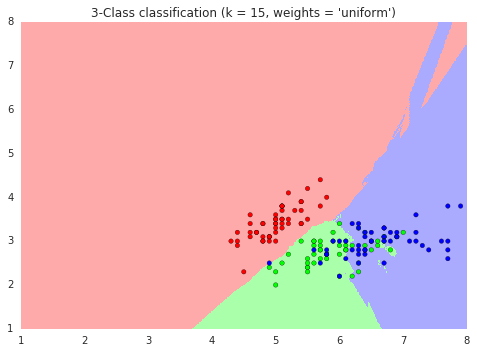

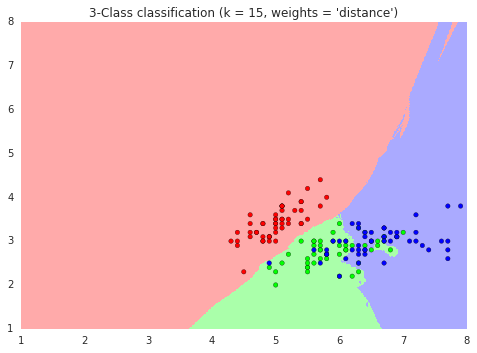

In [19]:
n_neighbors = 15
h = 0.01
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights, algorithm='brute')
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min = 1.0
    y_max = 8.0
    x_min= 1.0
    x_max= 8.0
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    #plt.xlim(xx.min(), xx.max())
    #plt.ylim(yy.min(), yy.max())
    plt.xlim(1.0, 8.0)
    plt.ylim(1.0, 8.0)
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [124]:
import math
closest = []
tp = np.array([7.8,7.8])
for ix,i in enumerate(X):
    dist = math.sqrt(sum((tp-i)**2))
    #print(ix, i, dist)
    closest.append((dist,iris.target[ix]))
    
closest.sort()
closest[:15]

[(3.9962482405376165, 0),
 (4.001249804748512, 2),
 (4.001249804748512, 2),
 (4.242640687119284, 2),
 (4.272001872658765, 0),
 (4.294182110716777, 0),
 (4.517742799230606, 0),
 (4.522167621838006, 0),
 (4.579301256742124, 0),
 (4.579301256742124, 0),
 (4.632493928760188, 2),
 (4.632493928760188, 2),
 (4.638965401897281, 2),
 (4.648655719667784, 2),
 (4.6690470119715, 1)]

[(0.0, 2),
 (0.0, 2),
 (0.0, 2),
 (4.440892098500626e-16, 1),
 (4.440892098500626e-16, 2),
 (4.440892098500626e-16, 2),
 (0.09999999999999964, 2),
 (0.10000000000000053, 0),
 (0.10000000000000053, 2),
 (0.19999999999999973, 1),
 (0.19999999999999973, 1),
 (0.19999999999999973, 2),
 (0.19999999999999973, 2),
 (0.20000000000000018, 0),
 (0.20000000000000018, 1)]

In [21]:
np.c_[xx.ravel(), yy.ravel()]

array([[ 3.3 ,  1.  ],
       [ 3.32,  1.  ],
       [ 3.34,  1.  ],
       ..., 
       [ 8.84,  5.38],
       [ 8.86,  5.38],
       [ 8.88,  5.38]])

NameError: name 'cmap_bold2' is not defined

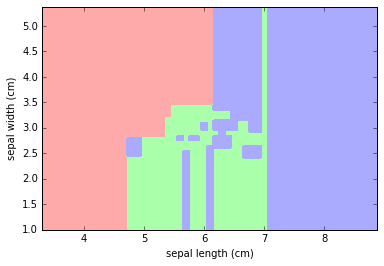

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "rgb"
plot_step = 0.02
tree_depth = 25

for pairidx, pair in enumerate([[0, 1]]):  #, [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    #mean = X.mean(axis=0)
    #std = X.std(axis=0)
    #X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier(max_depth=tree_depth)
    clf.fit(X, y)

    # Plot the decision boundary
    #plt.subplot(2, 3, pairidx + 1)
    plt.subplot(1, 1, pairidx + 1)


    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap_light)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=cmap_bold2)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

In [50]:
from sklearn import tree

In [64]:
tree.export_graphviz(clf,out_file='tree.dot',feature_names=['sepal_l','sepal_w']) 

In [54]:
%install_ext https://raw.github.com/tkf/ipython-hierarchymagic/master/hierarchymagic.py


Installed hierarchymagic.py. To use it, type:
  %load_ext hierarchymagic


/usr/local/lib/python3.4/dist-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension(s)as a python packages.
  "as a python packages.", UserWarning)


In [57]:
%load_ext hierarchymagic

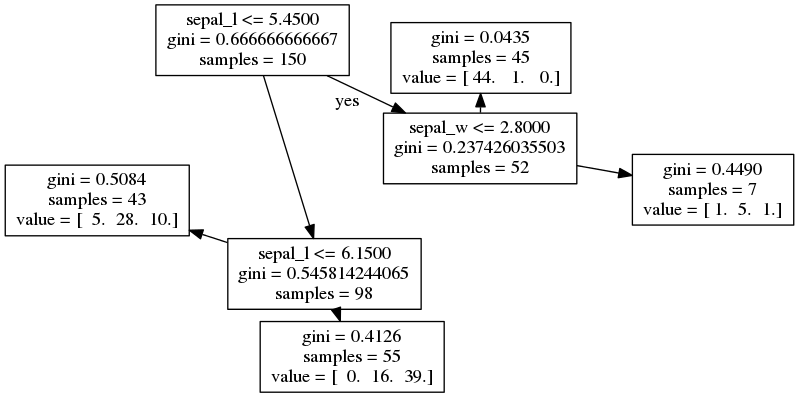

In [80]:
%%dot -- -Kfdp 
# %load tree.dot
digraph Tree {
0 [label="sepal_l <= 5.4500\ngini = 0.666666666667\nsamples = 150", shape="box"] ;
1 [label="sepal_w <= 2.8000\ngini = 0.237426035503\nsamples = 52", shape="box"] ;
0 -> 1 [label="yes"];
2 [label="gini = 0.4490\nsamples = 7\nvalue = [ 1.  5.  1.]", shape="box"] ;
1 -> 2 ;
3 [label="gini = 0.0435\nsamples = 45\nvalue = [ 44.   1.   0.]", shape="box"] ;
1 -> 3 ;
4 [label="sepal_l <= 6.1500\ngini = 0.545814244065\nsamples = 98", shape="box"] ;
0 -> 4 ;
5 [label="gini = 0.5084\nsamples = 43\nvalue = [  5.  28.  10.]", shape="box"] ;
4 -> 5 ;
6 [label="gini = 0.4126\nsamples = 55\nvalue = [  0.  16.  39.]", shape="box"] ;
4 -> 6 ;
}



## Random Forests

in random forests (see RandomForestClassifier and RandomForestRegressor classes), each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. In addition, when splitting a node during the construction of the tree, the split that is chosen is no longer the best split among all features. Instead, the split that is picked is the best split among a random subset of the features. As a result of this randomness, the bias of the forest usually slightly increases (with respect to the bias of a single non-random tree) but, due to averaging, its variance also decreases, usually more than compensating for the increase in bias, hence yielding an overall better model.
In contrast to the original publication [B2001], the scikit-learn implementation combines classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class.

Plot the decision boundaries for a RandomForestClassifier

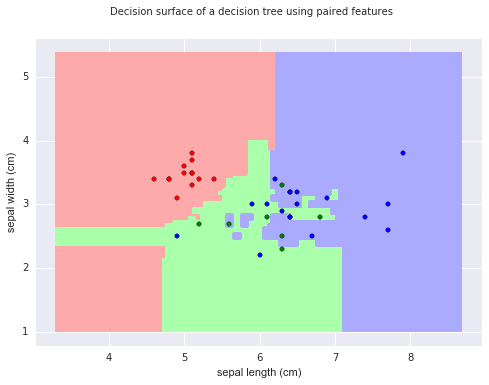

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

Xtrain, Xtest, Ctrain, Ctest = train_test_split(iris.data, iris.target)

# Parameters
n_classes = 3
plot_colors = "rgb"
plot_step = 0.02
tree_depth = 25

for pairidx, pair in enumerate([[0, 1]]):  #, [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    #X = iris.data[:, pair]
    #y = iris.target
    X = Xtrain[:, pair]
    y = Ctrain

    # Shuffle
#     idx = np.arange(X.shape[0])
#     np.random.seed(13)
#     np.random.shuffle(idx)
#     X = X[idx]
#     y = y[idx]

    # Standardize
    #mean = X.mean(axis=0)
    #std = X.std(axis=0)
    #X = (X - mean) / std

    # Train
    clf = RandomForestClassifier(n_estimators=25,)
    clf.fit(X, y)

    # Plot the decision boundary
    #plt.subplot(2, 3, pairidx + 1)
    plt.subplot(1, 1, pairidx + 1)


    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap_light)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    y=Ctest
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(Xtest[idx, 0], Xtest[idx, 1], c=color, #label=Ctest[i],#iris.target_names[i],
                    )

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()